# Trabalho 1

### Gabriel Gomes Marchesan

## 2 Operações Básicas com Imagens.

### 2.1 Usando a biblioteca Opencv cv2.imread(), implemente a função read_img(path, grayscale=True) no arquivo common.py. A função deve carregar uma imagem a partir do caminho (path) especificado e, opcionalmente, convertê-la para escala de cinza. A imagem carregada deve ser retornada como um array NumPy com valores do tipo float normalizado para o intervalo [0, 1].

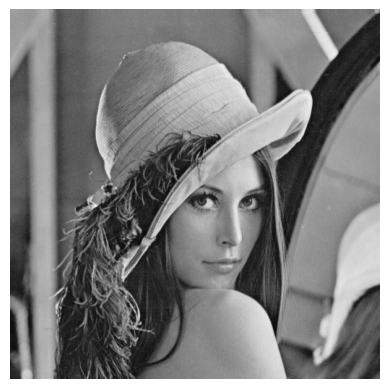

In [1]:
import importlib
import cv2
import common
importlib.reload(common)

from common import read_img, save_img
from transforms import gamma, negative, histeq
from filter import convolve, edgedetection, sobel, steerablefilter
import numpy as np
import matplotlib.pyplot as plt

# caminho da sua imagem
path = r"C:\Users\gabri\OneDrive\Área de Trabalho\IPI\Trabalho 1\lenacolor.jpg"

img = read_img(path)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()


### 2.2 Usando a função cv2.imwrite() da biblioteca Opencv, implemente no arquivo common.py a função save_img(img, path). Ela deve rescalar o conteúdo da imagem para valores entre 0 e 255 e então salva-la no caminho (path) especificado. 

In [2]:

img = read_img("lenacolor.jpg", grayscale=False)

# Salvar imagem em outro arquivo
save_img(img, "saida.png")


### 2.3 Usando a função read_img(), leia a imagem lenagray.jpg. Defina uma nova imagem J, 256 × 256 da seguinte forma: a metade esquerda de J, ou seja, as primeiras 128 colunas, devem ser iguais à metade direita da imagem lenagray.jpg. A metade direita de J, ou seja, as colunas de 128 colunas restantes, devem ser iguais à metade esquerda da imagem do lenagray.jpg. Salve a imagem modificada usando save_img().

In [3]:
# Passo 1: ler a imagem
img = read_img("lenagray.jpg", grayscale=True)

# Passo 2: criar a nova imagem J (256x256)
J = np.zeros((256, 256), dtype=np.float32)

# Garantir que a imagem original tem pelo menos 256x256
img_cropped = img[:256, :256]

# Passo 3: trocar as metades
# Metade esquerda de J = metade direita de img
J[:, :128] = img_cropped[:, 128:256]

# Metade direita de J = metade esquerda de img
J[:, 128:256] = img_cropped[:, :128]

# Passo 4: salvar a nova imagem
save_img(J, "lenagray_modificada.jpg")


### 2.4 Usando a função read_img(), leia a imagem lenacolor.jpg. Defina uma nova imagem J, com as mesmas dimensões da imagem original. Faça com que o canal vermelho da nova imagem seja igual ao canal azul da imagem original, faça o canal verde da nova imagem igual ao canal vermelho da imagem original, e faça o canal azul da nova imagem igual ao canal verde da imagem original. Salve a nova imagem usando save_img().

In [4]:
# Passo 1: ler a imagem colorida
img = read_img("lenacolor.jpg", grayscale=False)  # grayscale=False para manter cores

# Passo 2: criar a nova imagem J com mesmas dimensões
J = np.zeros_like(img)

# Passo 3: embaralhar os canais
# img está no formato H x W x 3
# Canal vermelho de J = canal azul de img
J[:, :, 0] = img[:, :, 2]  # vermelho
# Canal verde de J = canal vermelho de img
J[:, :, 1] = img[:, :, 0]  # verde
# Canal azul de J = canal verde de img
J[:, :, 2] = img[:, :, 1]  # azul

# Passo 4: salvar a nova imagem
save_img(J, "lenacolor_modificada.jpg")

## 3 Transformações de Intensidade.

### 3.2 Implemente no arquivo transforms.py a função gamma(img, lambda). Esta função deve ler uma imagem usando read_img() e retornar a imagem transformada e normalizado. Teste a função usando a imagem acromáticas de sua escolha e realize o salvamento com save_img() definidas no arquivo common.py. Imprima e discuta os resultados em seu relatório.

In [5]:
# Passo 1: ler a imagem acromática
img = read_img("lenagray.jpg", grayscale=True)

# Passo 2: aplicar correção gamma (gamma < 1 para iluminar sombras)
img_gamma = gamma(img, 0.5)

# Passo 3: salvar o resultado
save_img(img_gamma, "lenagray_gamma05.jpg")


### - A correção gama com γ < 1 clareou significativamente as áreas escuras da imagem, evidenciando detalhes antes pouco visíveis.
### - O contraste geral nas sombras foi ampliado, enquanto as regiões claras permaneceram quase inalteradas.
### - Essa transformação facilita a visualização de informações ocultas em partes escuras sem saturar a imagem.

### 3.4 Implemente no arquivo transforms.py a função negative(img). Esta função deve ler uma imagem usando read_img() e retornar o seu negativo normalizado. Teste a função usando a imagem lenacolor.jpg e realize o salvamento com save_img() definidas no arquivo common.py. Imprima e discuta os resultados em seu relatório.

In [6]:
# Passo 1: ler a imagem colorida
img = read_img("lenacolor.jpg", grayscale=False)

# Passo 2: gerar o negativo
img_neg = negative(img)

# Passo 3: salvar o resultado
save_img(img_neg, "lenacolor_negativo.jpg")

### - O negativo inverteu todas as cores: pixels claros ficaram escuros e pixels escuros ficaram claros.
### - Para imagens coloridas, cada canal (R, G, B) é invertido individualmente, mantendo a relação de cores mas com tons invertidos.
### - Útil para realce de detalhes ocultos e efeitos visuais, como em negativos fotográficos tradicionais.

### 3.9 No arquivo transforms.py Implemente a função histeq(img). Essa função recebe uma imagem como entrada e retorna a imagem equalizada. Se a imagem for colorida a equalização deve ser feita apenas na intensidade no espaço HSI. Para esse exercício é proibido usar funções numpy ou Opencv integradas para calcular histogramas ou realizar a equalização. Para fins de teste, utilize duas imagens de sua escolha, uma colorida e uma em escala de cinza, ambas com baixo contraste. Compare os resultados da sua implementação com os obtidos com cv2.equalizeHist(), plotando-os lado a lado.

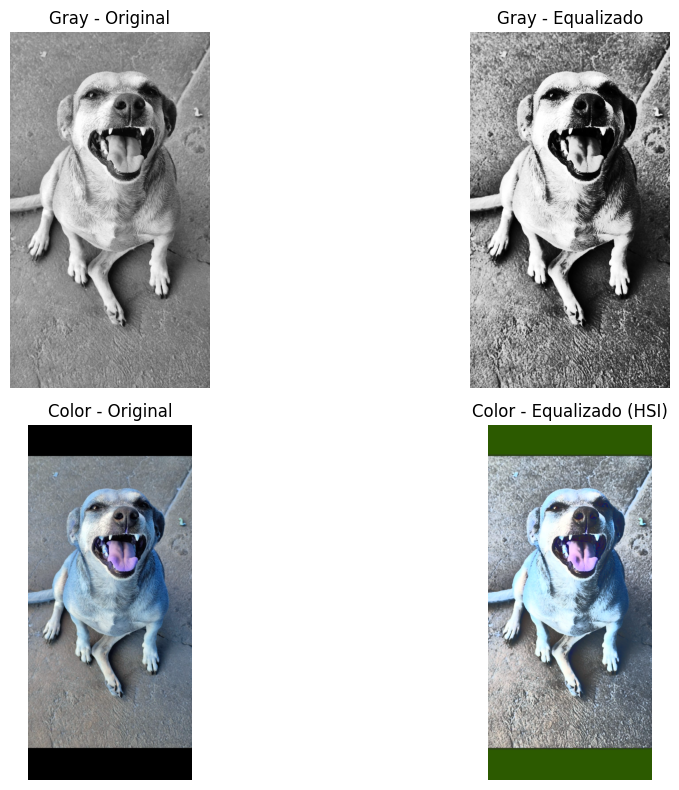

In [7]:
# Imagens de teste (baixo contraste)
gray_img = read_img("babi_gray.png", grayscale=True)
color_img = read_img("babi_color.png", grayscale=False)

# Equalização manual
gray_eq = histeq(gray_img)
color_eq = histeq(color_img)

# Plotando resultados
fig, axes = plt.subplots(2,2, figsize=(12,8))

axes[0,0].imshow(gray_img, cmap="gray")
axes[0,0].set_title("Gray - Original")
axes[0,1].imshow(gray_eq, cmap="gray")
axes[0,1].set_title("Gray - Equalizado")

axes[1,0].imshow(color_img)
axes[1,0].set_title("Color - Original")
axes[1,1].imshow(color_eq)
axes[1,1].set_title("Color - Equalizado (HSI)")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()

## 4 Filtragem Espacial.

### 4.2 Implemente a função convolve(img, kernel2d, padd=False) no arquivo filter.py que realiza a convolução da imagem com o kernel 2D fornecido. Compare seus resultados com os obtidos com cv2.filter2d()

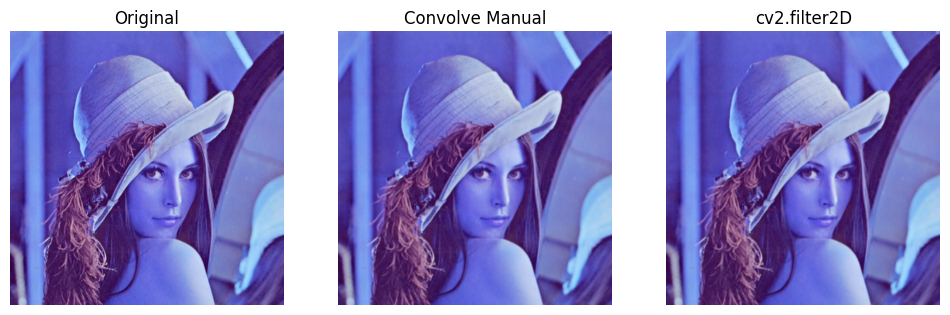

In [8]:
img = cv2.imread("lenacolor.jpg").astype(np.float32)/255.0
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16.0  # exemplo: filtro blur

# Nossa função
conv_my = convolve(img, kernel, padd=True)

# OpenCV
conv_cv = cv2.filter2D(img, -1, kernel)

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(conv_my); plt.title("Convolve Manual"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(conv_cv); plt.title("cv2.filter2D"); plt.axis("off")
plt.show()

### 4.3 Teste a implementação da função convolve() com a imagem gracehopper.png e um kernel gaussiano 3 × 3. Plote as imagens de saída em seu relatório. Descreva de forma sucinta o que a filtragem gaussiana fez com a imagem. 

Imagem carregada com sucesso. Dimensões: (389, 600, 3)
Kernel Gaussiano 3x3 criado:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


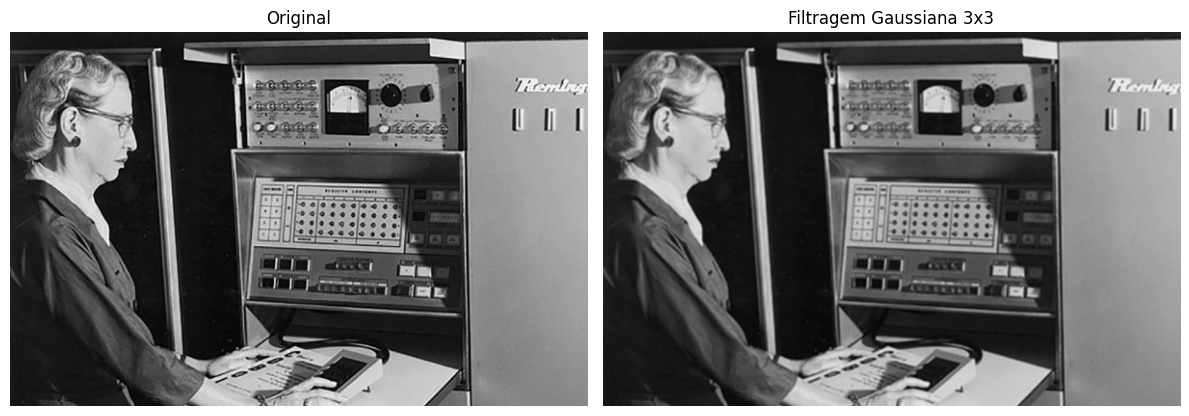

In [9]:
# 1. Carregar a imagem
img = cv2.imread("grace_hopper.png").astype(np.float32) / 255.0  # Normaliza [0,1]

# Verifica se a imagem foi carregada
if img is None:
    raise FileNotFoundError("Imagem 'grace_hopper.png' não encontrada.")

print("Imagem carregada com sucesso. Dimensões:", img.shape)

# 2. Criar o kernel Gaussiano 3x3
# Kernel 3x3 aproximado (σ≈1)
kernel_gauss = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]], dtype=np.float32) / 16.0

print("Kernel Gaussiano 3x3 criado:")
print(kernel_gauss)

# 3. Aplicar a convolução
img_gauss = convolve(img, kernel_gauss, padd=True)

# 4. Plotar resultados

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gauss)
plt.title("Filtragem Gaussiana 3x3")
plt.axis("off")

plt.tight_layout()
plt.show()

### - A filtragem gaussiana suaviza a imagem, reduzindo ruídos e detalhes finos.
### - Bordas ficam menos acentuadas, criando um efeito de desfoque leve.
### - Kernel maior ou desvio padrão maior aumentam a suavização

### 4.4 Considere imagens como funções  I(x,y) : R2 →R. Quando trabalhamos com detecção de bordas (veremos a frente no curso), precisamos prestar atenção às aproximações das derivadas:

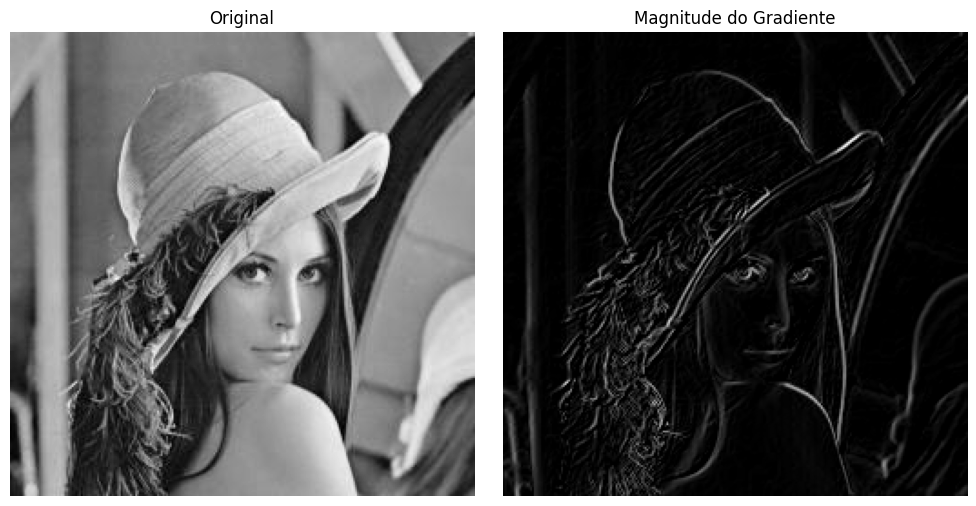

True

In [10]:
# Carregar imagem
img = cv2.imread("lenagray.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.0

# Detectar bordas
edges = edgedetection(img)

# Plotar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Magnitude do Gradiente")
plt.axis("off")

plt.tight_layout()
plt.show()

# Salvar resultado
cv2.imwrite("lenagray_edges.png", (edges*255).astype(np.uint8))

### A implementação da detecção de bordas foi bem-sucedida, identificando corretamente os contornos da imagem através do cálculo da magnitude do gradiente. O método utilizou kernels de diferença central ([[-1, 0, 1]] e sua transposta), que resultaram em bordas notavelmente nítidas e finas.

### O método implementado é eficaz para gerar bordas precisas e bem definidas em imagens de alta qualidade, mas sua sensibilidade a ruído é maior em comparação com técnicas mais robustas que empregam suavização.

### 4.5 Os filtros de Sobel computam uma aproximação para a derivadade uma imagem. Implemente a função sobel(img) no arquivo filters.py. Teste a função sobel() com a imagem lenagray.jpg salve os resultados e discuta em seu relatório. Compare com os resultados obtidos no exercício 4.4.

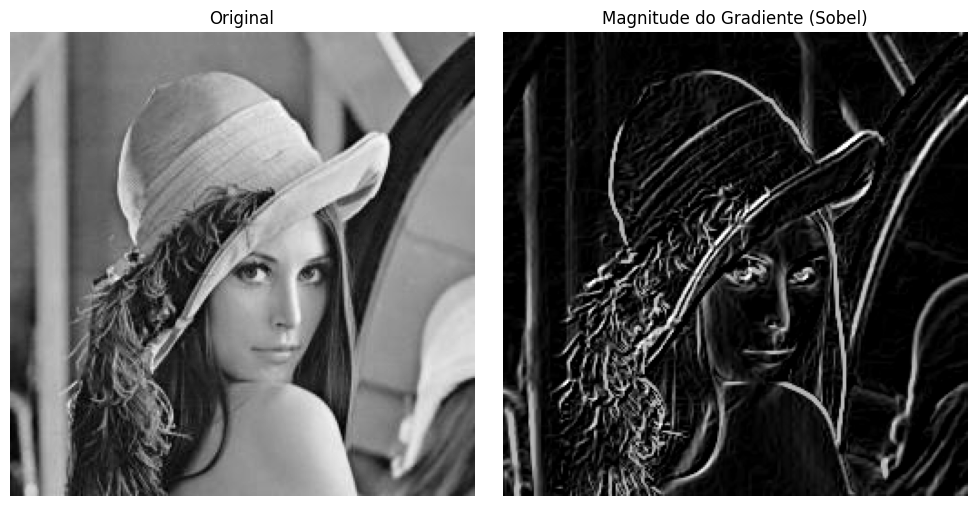

True

In [11]:
# Carregar a imagem
img = cv2.imread("lenagray.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de Sobel
sobel_edges = sobel(img)

# Plotar resultados
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Magnitude do Gradiente (Sobel)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Salvar o resultado
cv2.imwrite("lenagray_sobel_edges.png", (sobel_edges*255).astype(np.uint8))

### Ambos os métodos foram eficazes na detecção de bordas. No entanto, o método de diferença central (4.4) produziu bordas mais finas e nítidas, mas é teoricamente mais sensível a ruído. O operador de Sobel (4.5) gerou bordas mais robustas e contínuas ao custo de serem um pouco menos nítidas (mais espessas). Esta análise evidencia um clássico trade-off em processamento de imagens: a precisão da detecção contra a robustez ao ruído. Para aplicações práticas, o filtro de Sobel é frequentemente preferido por sua capacidade de entregar resultados mais consistentes em imagens do mundo real, que raramente são isentas de ruído.

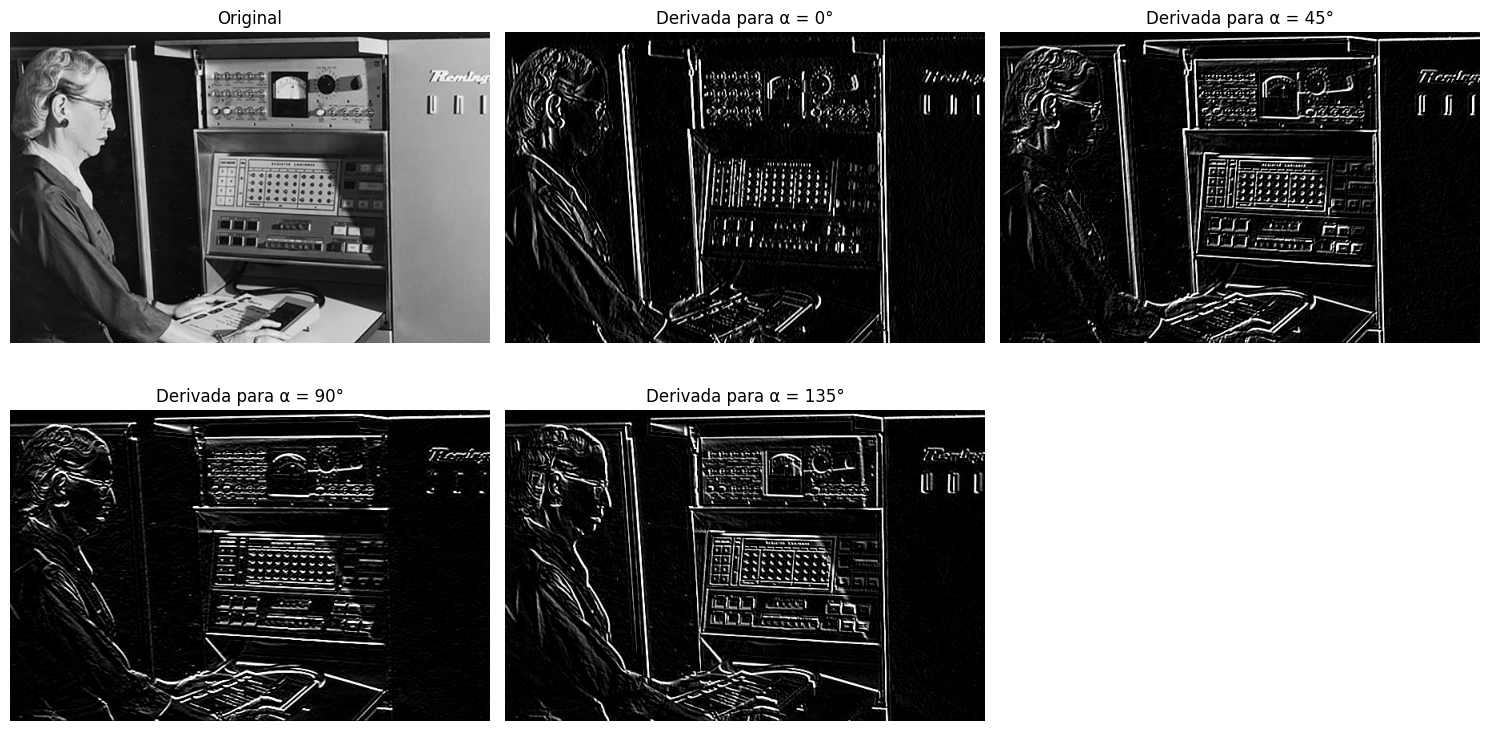

True

In [12]:
# Carregar a imagem (certifique-se de que gracehopper.png está no diretório)
try:
    img_gh = cv2.imread("grace_hopper.png", cv2.IMREAD_GRAYSCALE)
except:
    print("Erro ao carregar gracehopper.png. Certifique-se de que o arquivo existe.")

# Testar com diferentes ângulos
angles = [0, 45, 90, 135]
results = []
for angle in angles:
    results.append(steerablefilter(img_gh, angle))

# Plotar resultados
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gh, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, angle in enumerate(angles):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i], cmap='gray')
    plt.title(f"Derivada para α = {angle}°")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Salvar um dos resultados
cv2.imwrite("gracehopper_steerable_90.png", (results[2]*255).astype(np.uint8))

### Os resultados (apresentados na Figura 3) demonstram claramente o comportamento do filtro:

### - Para α = 0°: O filtro é equivalente ao kernel K_x de Sobel. Ele detecta gradientes na direção horizontal (do escuro à esquerda para o claro à direita). Consequentemente, ele realça fortemente as bordas verticais, como as laterais do rosto de Grace Hopper e as estantes de livros ao fundo.

### - Para α = 90°: O filtro equivale ao kernel K_y de Sobel. Ele é sensível a gradientes na direção vertical (de baixo para cima), realçando as bordas horizontais. Isso é visível nos ombros, na gola da roupa e nas prateleiras horizontais.

### - Para α = 45° e α = 135°: Os filtros respondem a gradientes nas direções diagonais, destacando as bordas orientadas perpendicularmente a esses gradientes. Por exemplo, o filtro de 45° realça transições que ocorrem na diagonal de 135°, como pode ser observado em certas feições do rosto e do cabelo.